# Fixing the data

In [6]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

The data from the official NIL division is imported, then the previously retrieved data on rents is imported as well. As can be seen, the areas of the two datasets differ in division and denomination.

In [7]:
map = gpd.read_file('~/Desktop/Project/milano2/NIL_WM.shp')
immobiliare = gpd.read_file('~/Desktop/Project/dataImmobiliare.csv')

print('Zones from Immobilare website:', list(immobiliare.Zone), '\n')
print('Zones from official NIL division:', list(map.NIL))

Zones from Immobilare website: ['Centro', 'Arco della Pace, Arena, Pagano', 'Genova, Ticinese', 'Quadronno, Palestro, Guastalla', 'Garibaldi, Moscova, Porta Nuova', 'Fiera, Sempione, City Life, Portello', 'Navigli', 'Porta Romana, Cadore, Montenero', 'Porta Venezia, Indipendenza', 'Centrale, Repubblica', 'Cenisio, Sarpi, Isola', 'Viale Certosa, Cascina Merlata', 'Bande Nere, Inganni', 'Famagosta, Barona', 'Abbiategrasso, Chiesa Rossa', 'Porta Vittoria, Lodi', 'Cimiano, Crescenzago, Adriano', 'Bicocca, Niguarda', 'Solari, Washington', 'Affori, Bovisa', 'San Siro, Trenno', 'Bisceglie, Baggio, Olmi', 'Ripamonti, Vigentino', 'Forlanini', 'Città Studi, Susa', 'Maggiolina, Istria', 'Precotto, Turro', 'Udine, Lambrate', 'Pasteur, Rovereto', 'Ponte Lambro, Santa Giulia', 'Corvetto, Rogoredo', 'Napoli, Soderini'] 

Zones from official NIL division: ['RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO', 'TRENNO', 'PORTELLO', 'BOVISASCA', 'PARCO NORD', 'FIGINO', 'LORETO - CASORETTO - NOLO', 'QUARTO O

For this reason, I decided to assign to each area of the NIL the respective area from Immobiliare.it, in order to be able to assign the rent values later. This action was done manually through the creation of a dictionary.

In [8]:
dic = {'RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO':'Famagosta, Barona', 'TRENNO':'San Siro, Trenno', 
'PORTELLO':'Fiera, Sempione, City Life, Portello', 'BOVISASCA':'Affori, Bovisa', 'PARCO NORD':'Bicocca, Niguarda', 'FIGINO':'San Siro, Trenno', 
'LORETO - CASORETTO - NOLO':'Città Studi, Susa', 'QUARTO OGGIARO - VIALBA - MUSOCCO':'Affori, Bovisa', 
'ISOLA':'Cenisio, Sarpi, Isola', 'QUARTO CAGNINO':'Bisceglie, Baggio, Olmi', 'STADIO - IPPODROMI':'San Siro, Trenno', 'QUINTO ROMANO':'Bisceglie, Baggio, Olmi', 
'DUOMO': 'Centro', 'GUASTALLA':'Quadronno, Palestro, Guastalla', 'SAN SIRO':'San Siro, Trenno', 'COMASINA':'Affori, Bovisa', 'TIBALDI':'Navigli', 'GRECO - SEGNANO':'Bicocca, Niguarda', 
'DE ANGELI - MONTE ROSA':'Fiera, Sempione, City Life, Portello', 'FARINI':'Cenisio, Sarpi, Isola', 'BRUZZANO':'Bicocca, Niguarda', 'QT 8':'San Siro, Trenno', 'STEPHENSON':'Viale Certosa, Cascina Merlata',
 'CANTALUPA':'Famagosta, Barona', 'QUINTOSOLE':'Ripamonti, Vigentino', 'PARCO SEMPIONE':'Arco della Pace, Arena, Pagano', 'BARONA':'Famagosta, Barona', 
 'VILLAPIZZONE - CAGNOLA - BOLDINASCO':'Viale Certosa, Cascina Merlata', "PARCO BOSCO IN CITTA'":'San Siro, Trenno', 'GORLA - PRECOTTO':'Precotto, Turro', 
 "NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE FULVIO TESTI":'Bicocca, Niguarda', 
 'TRIULZO SUPERIORE':'Ponte Lambro, Santa Giulia', 'PTA ROMANA':'Porta Romana, Cadore, Montenero', 'TALIEDO - MORSENCHIO - Q.RE FORLANINI':'Forlanini', 
 'PORTA TICINESE - CONCA DEL NAVIGLIO':'Genova, Ticinese', 'TRE TORRI':'Fiera, Sempione, City Life, Portello', 
 'ASSIANO':'Bisceglie, Baggio, Olmi', 'MORIVIONE':'Ripamonti, Vigentino', 
 'VIGENTINO - Q.RE FATIMA':'Ripamonti, Vigentino', 'BICOCCA':'Bicocca, Niguarda', 'ORTOMERCATO':'Porta Vittoria, Lodi', 'LODI - CORVETTO':'Corvetto, Rogoredo', 
 'MUGGIANO':'Bisceglie, Baggio, Olmi', 'PORTA TICINESE - CONCHETTA':'Navigli', 'UMBRIA - MOLISE - CALVAIRATE':'Porta Vittoria, Lodi', 
 'ROSERIO':'Affori, Bovisa', 'RONCHETTO DELLE RANE':'Abbiategrasso, Chiesa Rossa', 'Q.RE GALLARATESE - Q.RE SAN LEONARDO - LAMPUGNANO':'San Siro, Trenno', 
 "MONLUE' - PONTE LAMBRO":'Forlanini', 'PADOVA - TURRO - CRESCENZAGO':'Cimiano, Crescenzago, Adriano', 
 'GRATOSOGLIO - Q.RE MISSAGLIA - Q.RE TERRAZZE':'Abbiategrasso, Chiesa Rossa', 'PORTA MAGENTA':'Arco della Pace, Arena, Pagano', 'FORZE ARMATE':'San Siro, Trenno', 
 'GHISOLFA':'Cenisio, Sarpi, Isola', 'CHIARAVALLE':'Ripamonti, Vigentino', 'PARCO DELLE ABBAZIE':'Ripamonti, Vigentino', 'MACIACHINI - MAGGIOLINA':'Maggiolina, Istria', 
 'BANDE NERE':'Bande Nere, Inganni', 'LAMBRATE - ORTICA':'Udine, Lambrate', 'STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA FALLATA':'Abbiategrasso, Chiesa Rossa',
 'PORTA VIGENTINA - PORTA LODOVICA':'Navigli', 'SCALO ROMANA':'Corvetto, Rogoredo', 'XXII MARZO':'Porta Romana, Cadore, Montenero', 
 'CIMIANO - ROTTOLE - Q.RE FELTRE':'Udine, Lambrate', 'DERGANO':'Affori, Bovisa', 'BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA':'Bisceglie, Baggio, Olmi', 
 'PARCO FORLANINI - CAVRIANO':'Udine, Lambrate', 'GIARDINI P.TA VENEZIA':'Quadronno, Palestro, Guastalla', 'PORTA GARIBALDI - PORTA NUOVA':'Garibaldi, Moscova, Porta Nuova', 
 'AFFORI':'Affori, Bovisa', 'BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE':'Porta Venezia, Indipendenza', 'MONCUCCO - SAN CRISTOFORO':'Famagosta, Barona', 
 'STAZIONE CENTRALE - PONTE SEVESO':'Centrale, Repubblica', 'BOVISA':'Affori, Bovisa', 'MAGGIORE - MUSOCCO - CERTOSA':'Viale Certosa, Cascina Merlata', 
 'GIAMBELLINO':'Famagosta, Barona', "CITTA' STUDI":'Città Studi, Susa', 'PORTA GENOVA':'Navigli', 'CORSICA':'Città Studi, Susa', 
 'MAGENTA - S. VITTORE':'Genova, Ticinese', 
 'CASCINA MERLATA':'Viale Certosa, Cascina Merlata', 'SARPI':'Cenisio, Sarpi, Isola', 'PARCO DEI NAVIGLI':'Famagosta, Barona', 'PAGANO':'Arco della Pace, Arena, Pagano', 'BRERA':'Centro', 
 'ROGOREDO - SANTA GIULIA':'Ponte Lambro, Santa Giulia', 'ADRIANO':'Cimiano, Crescenzago, Adriano', 'LORENTEGGIO':'Bande Nere, Inganni'}

After having built the dictionary, it is turned into a dataframe, then merged to the immobilare dataset, from which only the necessary columns are taken.

In [9]:
translation = pd.DataFrame(dic.items(), columns=['NIL', 'Zone'])
new = translation.merge(immobiliare)
new= new[['NIL', 'Rent']]
new

,NIL,Rent
0,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,18.67
1,CANTALUPA,18.67
2,BARONA,18.67
3,MONCUCCO - SAN CRISTOFORO,18.67
4,GIAMBELLINO,18.67
...,...,...
83,CIMIANO - ROTTOLE - Q.RE FELTRE,17.93
84,PARCO FORLANINI - CAVRIANO,17.93
85,PORTA GARIBALDI - PORTA NUOVA,28.03
86,BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE,23.31


Finally, the temporary dataset is merged with the values of the NIL datset, which can be viewed below first as a normal map.

<AxesSubplot: >

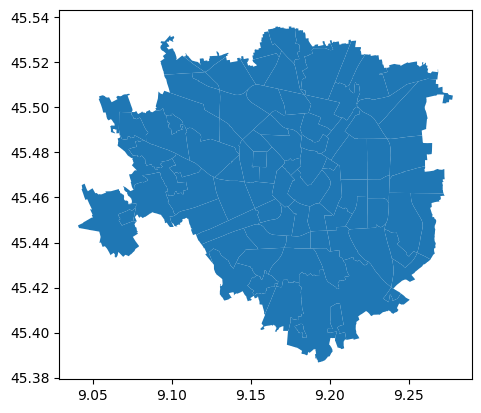

In [11]:
map_final = map.merge(new)
map_final = map_final[['NIL', 'Shape_Area', 'geometry', 'Rent']]
map_final.plot()

In [12]:
#map_final.to_file('milano.shp')  #this is run just when the dataset needs to be saved.

Then, the map can be viewed as a choropleth with the intensity of the values of the rents, going from blue (least expensive), to red (most expensive).

<AxesSubplot: >

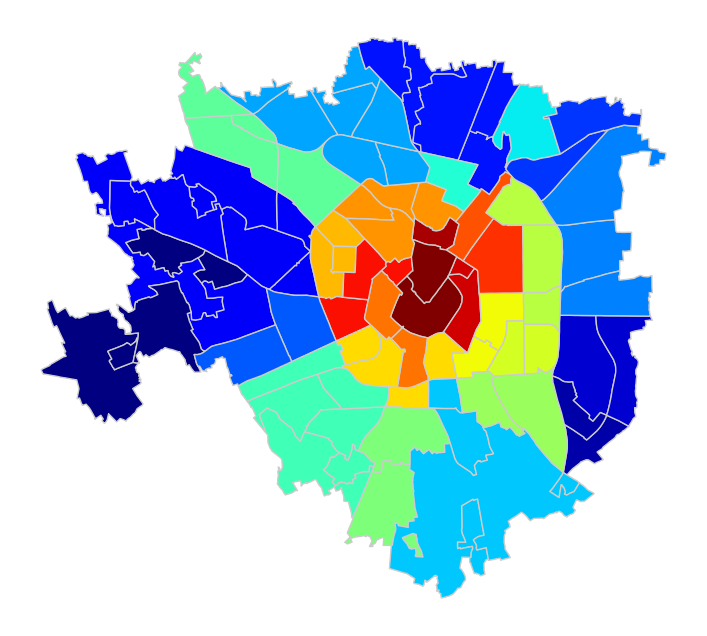

In [ ]:
milano = gpd.read_file('~/Desktop/Project/milano.shp')

vmin = milano['Rent'].min()
vmax = milano['Rent'].max()
cmap = 'jet'
fig, ax = plt.subplots(1, figsize=(20, 8))
ax.axis('off')
milano.plot(column='Rent', ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)